# **Bias measuring and mitigation in classification tasks**

With the increasing use of machine learning models in different areas, it has become important to address the bias problem in these models. This issue can appear in different aspects such as racial, gender or socioeconomic biases leading to unfair outcomes in decision-making processes, for instance, in classification tasks, where models are trained to classify data into different categories.

There are various techniques to measure bias in classification models such as Equalized Odds, Demographic Parity or Opportunity Equality for instance, which quantify the differences in the model's performance across different subgroups based on sensitive attributes such as gender or race.

Once bias is detected, we can employ different techniques to mitigate it. These methods can be grouped into three categories: Pre-processing, in-processing and post-processing methods. Pre-processing techniques are used to adjust the training data to remove bias, while in-processing methods are applied to build robust models against bias. Finally, post-processing techniques are used to adjust the model's predictions to remove bias.

Through this tutorial, we pretend to present you tools which can be easily applied to measure and mitigate the presence of bias in classification models.

We will follow the traditional outline for this tutorial:

1. Data loading and packages installation
2. Dataset preprocessing
3. Data analysis
4. Model training
5. Bias measuring
6. Bias mitigation
7. Results comparison

## **1. Data loading and packages installation**

First of all, we need to install the required packages to perform our bias analysis and mitigation, in this case we will use the holisticai package, this library can be installed by running the following command:

In [ ]:
!pip install holisticai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.2/238.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 58.7 MB/s eta 0:00:00


In [ ]:
from holisticai.datasets import load_adult
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Settings
np.random.seed(0)
import warnings
warnings.filterwarnings("ignore")

The dataset that we will use is the "Adult" dataset from the UCI Machine Learning Repository, this is a publicly available dataset that contains information about age, education, marital status, race and gender of individuals from the United States. The objective is to predict whether an individual's income will be above or below $50K per year.

Source: [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/adult)

In [ ]:
# Dataset
data = load_adult()
df = pd.concat([data["data"], data["target"]], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data['data'].isna().sum(), data['data'].shape

(age                  0
 workclass         2799
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        2809
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     857
 dtype: int64,
 (48842, 14))

## **2. Dataset preprocessing**
Now that we have the complete dataset, from the previous inspection we can see that there are some columns taht present missing data. Therefore we need to perform a data pre-processing step to take a decision, whether to remove it or fill it with some values, before to feed it into the machine learning model.

In [ ]:
df_clean = df.iloc[:,[i for i,n in enumerate(df.isna().sum(axis=0).T.values) if n<1000]]
df_clean = df_clean.dropna()
df_clean.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47985.000000,4.798500e+04,47985.000000,47985.000000,47985.000000,47985.000000
mean,38.641284,1.895940e+05,10.067229,1067.032093,87.370553,40.411483
std,13.729622,1.057605e+05,2.560534,7373.256663,402.681462,12.391073
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.shape, df_clean.shape

((48842, 15), (47985, 13))

Now that we have a clean dataset we can start defining the protected groups and the training and testing sets.

## **3. Data analysis**

Once the dataset have been preprocessed we can perform some analysis into the sex and race features in order to define the protected attribute. The `holisticai` library possesses some useful plotting tools that we can use, for example the `group_pie_plot` function that allows us to observe the proportions of the categories of the instances in a certain feature:

<Axes: >

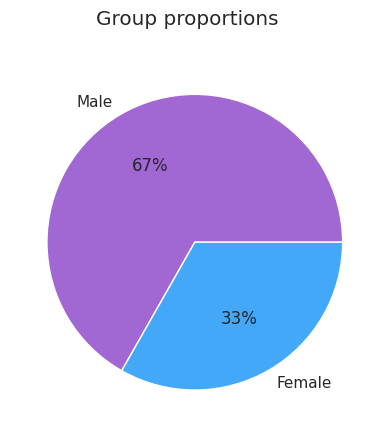

In [ ]:
from holisticai.bias.plots import group_pie_plot

group_pie_plot(df_clean["sex"])

<Axes: >

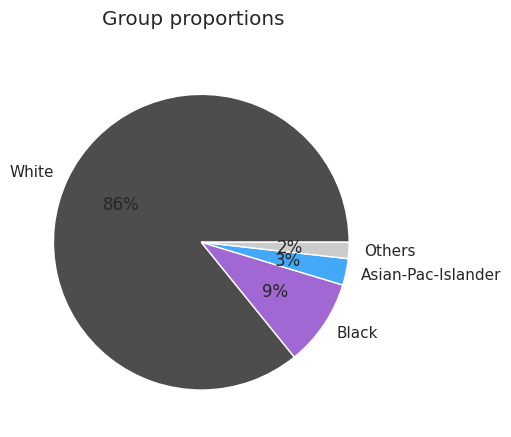

In [ ]:
group_pie_plot(df_clean["race"])

The previous graphs show us that the proportion of male is high compared to the female, also that the proportion of white people is very high compared with the remaining ones.

For this opportunity we will select the "Sex" feature as the protected attribute for our later analysis. Therefore we need to convert from categories to a binary feature.

In [ ]:
group = ["sex"]
group_a = df_clean[group] == "Female"
group_b = df_clean[group] == "Male"

group_a = np.squeeze(group_a.values)
group_b = np.squeeze(group_b.values)

We will apply the same criterion for the target variable

In [ ]:
df_clean["class"].replace({">50K": 1, "<=50K": 0}, inplace=True)
df_clean.head()

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,226802.0,11th,7.0,Never-married,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38.0,89814.0,HS-grad,9.0,Married-civ-spouse,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28.0,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44.0,160323.0,Some-college,10.0,Married-civ-spouse,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
4,18.0,103497.0,Some-college,10.0,Never-married,Own-child,White,Female,0.0,0.0,30.0,United-States,0


Now that we have our protected groups, let's going to remove the unnecessary columns from the dataset. Since we saw before that the race feature is very unbalanced, we will remove it too from the dataset as well as the "education" feature since the dataset already has the same variable but numeric instead of categorical.

In [ ]:
tmp = pd.get_dummies(df_clean.drop(columns=["sex", "race", "education"]))
df_clean = pd.concat([tmp, df_clean["class"]], axis=1)

In [ ]:
df_clean.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_0,class_1,class
0,25.0,226802.0,7.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
3,44.0,160323.0,10.0,7688.0,0.0,40.0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
4,18.0,103497.0,10.0,0.0,0.0,30.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


Let's plot the columns with the highest correlations with respect to the target variable.

In [ ]:
df_corr = df_clean.corr()
n = 10
columns = df_corr.nlargest(n, 'class_1')['class_1'].index
cm = np.corrcoef(df_clean[columns].values.T)
cm = np.around(cm, 2)

In [ ]:
import matplotlib.pyplot as plt

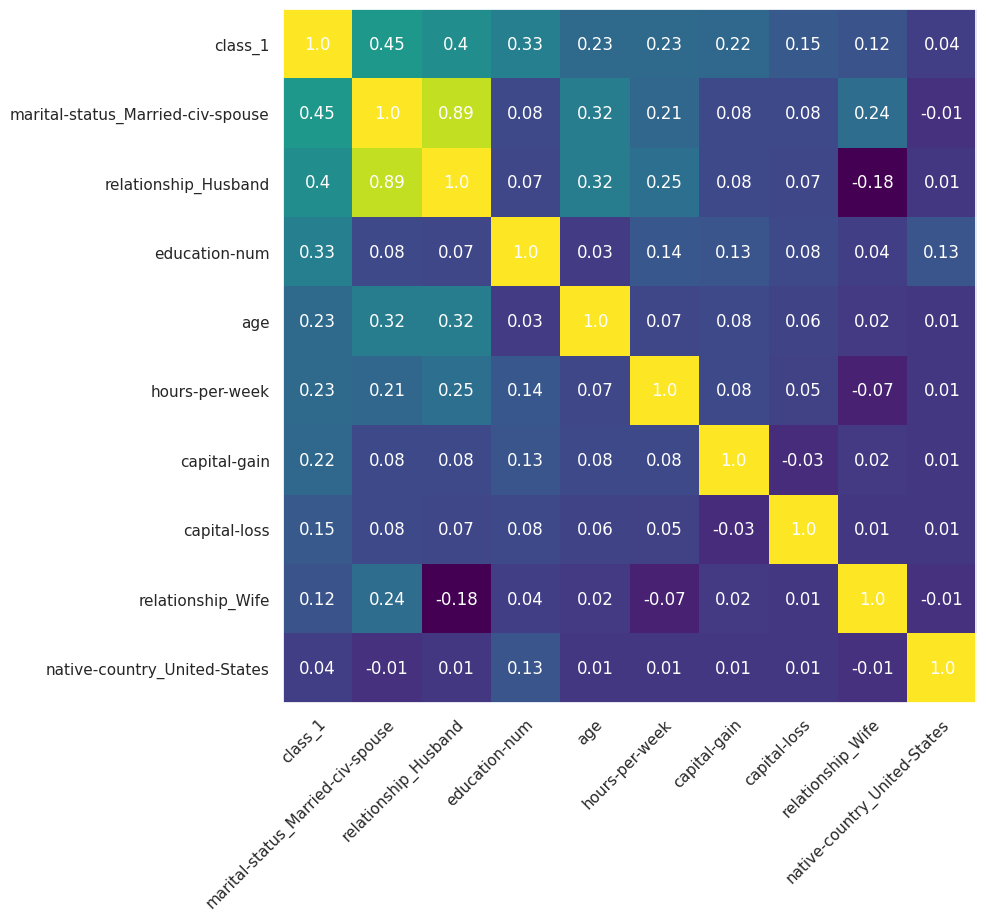

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, cmap='viridis')
ax.set_xticks(np.arange(len(df_clean[columns].columns)), labels=df_clean[columns].columns)
ax.set_yticks(np.arange(len(df_clean[columns].columns)), labels=df_clean[columns].columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.grid(None)
# Loop over data dimensions and create text annotations.
for i in range(len(df_clean[columns].columns)):
    for j in range(len(df_clean[columns].columns)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
        
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = df_clean.values[:,:-3]
y = df_clean.values[:,-1]

In [ ]:
X_train,X_test,y_train,y_test, group_a_tr, group_a_ts, group_b_tr, group_b_ts = \
    train_test_split(X, y, group_a, group_b, test_size=0.2, random_state=42)
train_data = X_train, y_train, group_a_tr, group_b_tr
test_data  = X_test, y_test, group_a_ts, group_b_ts

## **4. Model training**

Once we have defined the training and testing sets, we can train a model as usual. Since the protected groups were separated from the dataset previously we do not need to take care of that in this opportunity, but do not forget to separate the protected attributes from the dataset, so that the model does not have any influence from these attributes in its training process. For the training process, we will use a traditional pipeline, we will fit and re-scale the training data, and then we will use the data to train a "Logistic regression" model and once the model has been trained, we can use its predictions to calculate the fairness metrics of the it.

In [ ]:
# sklearn imports
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from holisticai.pipeline import Pipeline

In [ ]:
X, y, group_a, group_b = train_data

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train a simple linear classification model
LR = LogisticRegression()
model = LR.fit(X, y)

X, y, group_a, group_b = test_data

X = scaler.transform(X)

# Predict values
y_pred = model.predict(X)

y_proba = model.predict_proba(X)
y_score = y_proba[:,1]
y_true = y

## **5. Bias measuring**

The fairness of the model can be calculated using the predictions of the model and the protected groups defined previously. The `holisticai` contains a module that calculates a set of metrics useful in evaluating the fairness of algorithmic decisions. For our case, we will use the `classification_bias_metrics6` function which allows us to select which metrics we want to calculate, if `equal_outcome`, `equal_opportunity` or `both`, where equal_outcome shows how disadvantaged groups are treated by the model and equal_opportunity shows if all the groups have the same opportunities.

In [ ]:
from holisticai.bias.metrics import classification_bias_metrics

In [ ]:
df = classification_bias_metrics(
    group_a,
    group_b,
    y_pred,
    y,
    metric_type='both'
)
y_baseline = y_pred.copy()
df_baseline=df.copy()
df_baseline

,Value,Reference
Metric,,
Statistical Parity,-0.175836,0
Disparate Impact,0.304267,1
Four Fifths Rule,0.304267,1
Cohen D,-0.454655,0
2SD Rule,-20.530369,0
Equality of Opportunity Difference,-0.126491,0
False Positive Rate Difference,-0.082923,0
Average Odds Difference,-0.104707,0
Accuracy Difference,0.112691,0


For example:

*   **Statistical parity:** Computes the difference in success rates between the protected groups. Values below 0 are considered unfair towards `group_a` while values above 0 are considered unfair towards `group_b`, the range (-0.1, 0.1) is considered acceptable.
*   **Disparate Impact:** Shows the ratio of success rates between the protected groups for a certain quantile. Values below 1 are unfair towards `group_a`. Values above 1 are unfair towards `group_b`. The range (0.8, 1.2) is considered acceptable.
*   **Four Fifths:** Computes the ratio of success rates between the protected groups. Values below 1 are considered unfair while a range between (0.8, 1) is considered acceptable.
*   **Cohen D:** Computes the normalised statistical parity between the protected groups. Values below 0 are considered unfair towards `group_a` while values above 0 are considered unfair towards `group_b`.
*   **Equality of opportunity difference:** Computes the difference in true positive rates between the protected groups. Values below 0 are considered unfair towards `group_a` while values above 0 are considered unfair towards `group_b`.
*   **False positive rate difference:** Computes the difference in false positive rates between the protected groups, negative values indicating bias against `group_a` while positive values indicating bias against `group_b`.
*   **Average Odds Difference:** Computes the difference in average odds between the protected groups, negative values indicating bias against `group_a` while positive values indicating bias against `group_b`, a range between (-0.1, 0.1) is considered acceptable.
*   **Accuracy Difference:** Computes the difference in accuracy of predictions for the protected groups, positive values show bias against `group_b` while negative values show bias against `group_a`.


Source: [*HolisticAI docs*](https://holisticai.readthedocs.io/en/latest/metrics.html#binary-classification)

## **6. Bias mitigation**
### **Prejudice Remover - Inprocessing method**

Now that we could observe that the model metrics are far away from the desired values, we need to apply some kind of strategy to mitigate the bias present in the model.

Exists different kinds of strategies, and the literature has divided them into three categories: *Pre-processing*, *in-processing* and *post-processing* methods. The `holisticai` library possesses different algorithms from these categories for bias mitigation. An interesting feature is that all of them are compatible with the `Scikit-learn` package, so that, if you are familiar with this package, you will not have problems using the library. As you will see later, its implementation can be done following the traditional way, or by applying the pipeline. 

For this opportunity, we will implement the "Prejudice remover" method which is an in-processing technique that adds a discrimination-aware regularization term to the learning objective.

### **Traditional implementation**

In [ ]:
from holisticai.bias.mitigation import PrejudiceRemover

In [ ]:
inprocessing_model = PrejudiceRemover(
        maxiter=100, fit_intercept=True, verbose=1, print_interval=1
    ).transform_estimator()

X, y, group_a, group_b = train_data

scaler = StandardScaler()
X = scaler.fit_transform(X)

inprocessing_model.fit(X, y, group_a, group_b)

X, y, group_a, group_b = test_data

X = scaler.transform(X)

y_pred = inprocessing_model.predict(X, group_a, group_b)

df = classification_bias_metrics(
    group_a,
    group_b,
    y_pred,
    y,
    metric_type='both'
)
df_prej_rem = df.copy()
df_prej_rem


[elapsed time: 00:00:13 | Best Loss : 13840.1183]


,Value,Reference
Metric,,
Statistical Parity,-0.080963,0
Disparate Impact,0.617994,1
Four Fifths Rule,0.617994,1
Cohen D,-0.209541,0
2SD Rule,-9.629959,0
Equality of Opportunity Difference,0.084514,0
False Positive Rate Difference,-0.010771,0
Average Odds Difference,0.036872,0
Accuracy Difference,0.090653,0


### **Pipeline implementation**

Now that we could see how this method is implemented traditionally, let's try implementing it by using the Scikit-learn Pipeline! Notice that we shouldn't have variations in the metrics for the previous implementation.

In [ ]:
inprocessing_model = PrejudiceRemover(
        maxiter=100, fit_intercept=True, verbose=1, print_interval=1
    ).transform_estimator()

pipeline = Pipeline(
    steps=[
        ('scalar', StandardScaler()),
        ("bm_inprocessing", inprocessing_model),
    ]
)

X, y, group_a, group_b = train_data
fit_params = {
    "bm__group_a": group_a, 
    "bm__group_b": group_b
}

pipeline.fit(X, y, **fit_params)

X, y, group_a, group_b = test_data
predict_params = {
    "bm__group_a": group_a,
    "bm__group_b": group_b,
}
y_pred = pipeline.predict(X, **predict_params)
df = classification_bias_metrics(
    group_a,
    group_b,
    y_pred,
    y,
    metric_type='both'
)
df_prej_rem_w_p = df.copy()
df_prej_rem_w_p


[elapsed time: 00:00:10 | Best Loss : 13840.1183]


,Value,Reference
Metric,,
Statistical Parity,-0.080963,0
Disparate Impact,0.617994,1
Four Fifths Rule,0.617994,1
Cohen D,-0.209541,0
2SD Rule,-9.629959,0
Equality of Opportunity Difference,0.084514,0
False Positive Rate Difference,-0.010771,0
Average Odds Difference,0.036872,0
Accuracy Difference,0.090653,0


## **7. Results comparison**
Now that we could observe how is the implementation of the mitigator in the model, we will compare the results between the baseline and the implementations with the mitigator to analyse how the metrics have changed.

In [ ]:
result = pd.concat([df_baseline, df_prej_rem, df_prej_rem_w_p], axis=1).iloc[:, [0,2,4,1]]
result.columns = ['Baseline','Mitigator without pipeline',"Mitigator with pipeline", 'Reference']
result

,Baseline,Mitigator without pipeline,Mitigator with pipeline,Reference
Metric,,,,
Statistical Parity,-0.175836,-0.080963,-0.080963,0
Disparate Impact,0.304267,0.617994,0.617994,1
Four Fifths Rule,0.304267,0.617994,0.617994,1
Cohen D,-0.454655,-0.209541,-0.209541,0
2SD Rule,-20.530369,-9.629959,-9.629959,0
Equality of Opportunity Difference,-0.126491,0.084514,0.084514,0
False Positive Rate Difference,-0.082923,-0.010771,-0.010771,0
Average Odds Difference,-0.104707,0.036872,0.036872,0
Accuracy Difference,0.112691,0.090653,0.090653,0


From the previous chart, we can see that although the actual metrics are still far from the ideal values, an improvement is obtained by applying this method in the dataset, compared with our baseline. 

Notice that we can analyse how these values are affected by varying the hyperparameters of the method.

For example, this method allows us to set different hyperparameters such us the fairness penalty, initialization type, number of iterations and so on, you will find more in its documentation [here](https://holisticai.readthedocs.io/en/latest/.generated/holisticai.bias.mitigation.PrejudiceRemover.html#holisticai.bias.mitigation.PrejudiceRemover)

In this opportunity we will try with different initializations:

In [ ]:
def calculate_metrics(train_data, test_data, init_type, metrics_cols):
  inprocessing_model = PrejudiceRemover(
        fit_intercept = True,
        maxiter= 200,
        init_type = init_type,
        verbose = 0,
    ).transform_estimator()

  pipeline = Pipeline(
      steps=[
          ('scalar', StandardScaler()),
          ("bm_inprocessing", inprocessing_model),
      ]
  )

  X, y, group_a, group_b = train_data
  fit_params = {
      "bm__group_a": group_a, 
      "bm__group_b": group_b
  }

  pipeline.fit(X, y, **fit_params)

  X, y, group_a, group_b = test_data
  predict_params = {
      "bm__group_a": group_a,
      "bm__group_b": group_b,
  }
  y_pred = pipeline.predict(X, **predict_params)
  df = classification_bias_metrics(
      group_a,
      group_b,
      y_pred,
      y,
      metric_type='both'
  )
  # Calculate metrics
  metrics = [
      init_type,
  ]
  metrics.extend([df['Value'].loc[col] for col in metrics_cols])
  return metrics

In [ ]:
metrics_val = []
metrics_cols = ['Statistical Parity', 'Disparate Impact']

init_types = ["Zero", "Random", "StandarLR", "StandarLRbyGroup"]

for init_type in init_types:
  metrics_val.append(calculate_metrics(train_data, test_data, init_type, metrics_cols))

metrics = ['init_types']
metrics.extend(metrics_cols)
df_metrics = pd.DataFrame(metrics_val, columns=metrics)
df_metrics

,init_types,Statistical Parity,Disparate Impact
0,Zero,-0.080963,0.617994
1,Random,-0.115349,0.463663
2,StandarLR,-0.089247,0.625574
3,StandarLRbyGroup,-0.145202,0.370169


Text(0.5, 0, 'Initialization')

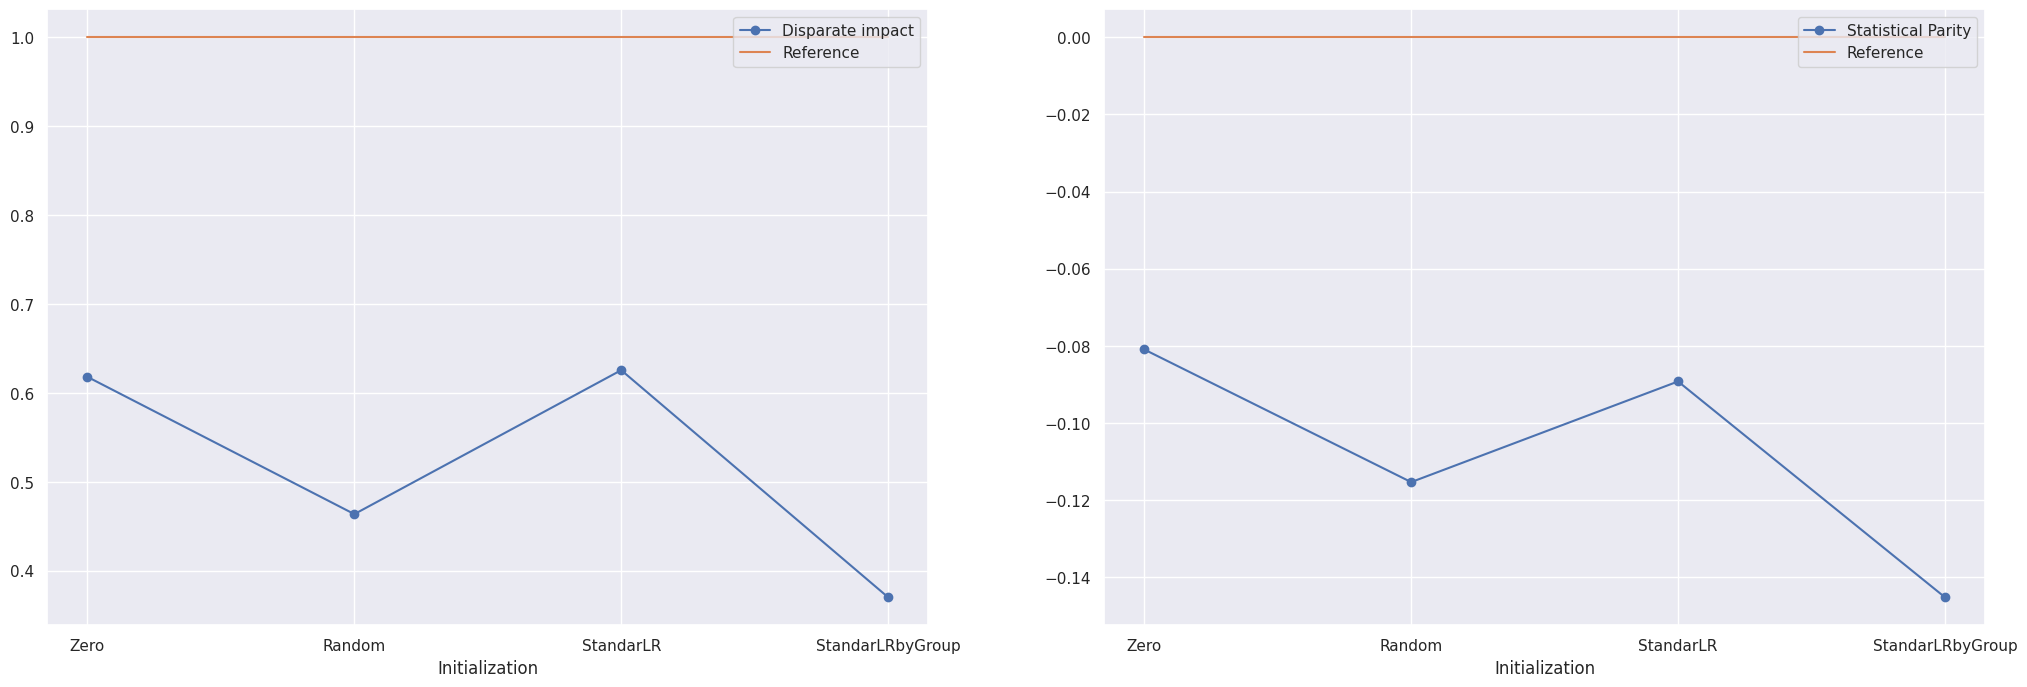

In [ ]:
x_axis = df_metrics.init_types
plt.figure(figsize=(25,8))
plt.subplot(121)
plt.plot(x_axis, df_metrics['Disparate Impact'], 'o-', label='Disparate impact')
plt.plot(x_axis, np.ones_like(df_metrics['Disparate Impact']), label='Reference')
plt.legend(loc='upper right')
plt.xlabel('Initialization')
plt.subplot(122)
plt.plot(x_axis, df_metrics['Statistical Parity'], 'o-', label='Statistical Parity')
plt.plot(x_axis, np.zeros_like(df_metrics['Statistical Parity']), label='Reference')
plt.legend(loc='upper right')
plt.xlabel('Initialization')

Interestingly we can see that the selection of different initialization will vary the performance of the mitigator, where some of them perform better than others. In general, the selection of the model parameters will depend on our main objective, whether we are looking for fairness or accuracy.

## **Summary**
Through this tutorial we could present to the user how the `holisticai` library can be easily used to measure the bias present in classification models by the application of the `classification_bias_metrics` function, which returns the calculated values for different metrics and their references respectively. 

In addition, we shown how to mitigate the bias by applying some methods, for this opportunity we applied the "Prejudice remover" technique to train a fairness model, this is a in-processing method that reduces the statistical dependence between sensitive features and the remaining information to increase the fairness of the model.